In [1]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination, ApproxInference


import numpy as np

from utils import *

import networkx as nx

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
PER_UNIT_GDP = 'Per unit GDP'
ROAD_DENSITY = 'Road density'
POPULATION_DENSITY = 'Population density'
ELEVATION = 'Elevation'
SLOPE = 'Slope'
RAINFALL_FREQUENCY = 'Rainfall frequency'
RIVER_DENSITY = 'River density'
RAINFALL_AMOUNT = 'Rainfall amount'
FLOOD = 'Flood'

In [4]:
variables = [
    PER_UNIT_GDP,
    ROAD_DENSITY,
    POPULATION_DENSITY,
    ELEVATION,
    SLOPE,
    RAINFALL_FREQUENCY,
    RIVER_DENSITY,
    RAINFALL_AMOUNT,
    FLOOD
]

In [5]:
values_dictionary = {
    PER_UNIT_GDP: [
        [0.3], 
        [0.63], 
        [0.07]
    ],
    POPULATION_DENSITY: [
        [0.7, 0.3, 0.05],
        [0.2, 0.55, 0.25],
        [0.1, 0.15, 0.7],
    ],
    ROAD_DENSITY: [
        [0.8, 0.7, 0.1, 0.6, 0.4, 0.1, 0.1, 0.05, 0.01],
        [0.19, 0.25, 0.35, 0.3, 0.5, 0.25, 0.25, 0.2, 0.15],
        [0.01, 0.05, 0.55, 0.1, 0.1, 0.65, 0.65, 0.75, 0.84]
    ],
    ELEVATION: [
        [0.15],
        [0.1], 
        [0.75]
    ],
    SLOPE: [
        [0.75, 0.6, 0.05], 
        [0.25, 0.4, 0.95]
    ],
    RAINFALL_FREQUENCY: [
        [0.3], 
        [0.6], 
        [0.1]
    ],
    RIVER_DENSITY: [
        [0.4], 
        [0.6]
    ],
    RAINFALL_AMOUNT: [
        [0.7, 0.5, 0.55, 0.3, 0.1, 0.01],
        [0.2, 0.25, 0.3, 0.4, 0.3, 0.04],
        [0.1, 0.25, 0.15, 0.3, 0.6, 0.95]
    ],
    FLOOD: [
        [0.07, 0.03, 0.005, 0.2, 0.1, 0.008, 0.05, 0.009, 0.0005, 0.13, 0.08, 0.006, 0.008, 0.002, 0.0001, 0.1, 0.04, 0.0002],
        [0.93, 0.97, 0.995, 0.8, 0.9, 0.992, 0.95, 0.991, 0.9995, 0.87, 0.92, 0.994, 0.992, 0.998, 0.9999, 0.9, 0.96, 0.9998]
    ],
}

# FLOOD, ROAD_DENSITY, SLOPE, RAINFALL_AMOUNT

In [6]:
state_names_dictionary = {
    PER_UNIT_GDP: ['High', 'Medium', 'Low'],
    POPULATION_DENSITY: ['Dense', 'Medium', 'Sparse'],
    ROAD_DENSITY: ['Dense', 'Medium', 'Sparse'],
    ELEVATION: ['High', 'Medium', 'Low'],
    SLOPE: ['Steep', 'Flat'],
    RAINFALL_FREQUENCY: ['Frequent', 'Medium', 'Rare'],
    RIVER_DENSITY: ['Dense', 'Sparse'],
    RAINFALL_AMOUNT: ['Huge', 'Medium', 'Little'],
    FLOOD: ['Yes', 'No']
}

In [7]:
edges = [
    (PER_UNIT_GDP, ROAD_DENSITY), 
    (PER_UNIT_GDP, POPULATION_DENSITY), 
    (POPULATION_DENSITY, ROAD_DENSITY),
    (ROAD_DENSITY, FLOOD),
    (ELEVATION, SLOPE),
    (SLOPE, FLOOD),
    (RAINFALL_FREQUENCY, RAINFALL_AMOUNT),
    (RIVER_DENSITY, RAINFALL_AMOUNT),
    (RAINFALL_AMOUNT, FLOOD)
]

In [8]:
evidence_dictionary = {
    PER_UNIT_GDP: None,
    POPULATION_DENSITY: [PER_UNIT_GDP],
    ROAD_DENSITY: [PER_UNIT_GDP, POPULATION_DENSITY],
    ELEVATION: None,
    SLOPE: [ELEVATION],
    RAINFALL_FREQUENCY: None,
    RIVER_DENSITY: None,
    RAINFALL_AMOUNT: [RAINFALL_FREQUENCY, RIVER_DENSITY],
    FLOOD: [ROAD_DENSITY, SLOPE, RAINFALL_AMOUNT]
}

In [9]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel(edges)

C:\Users\franc\anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


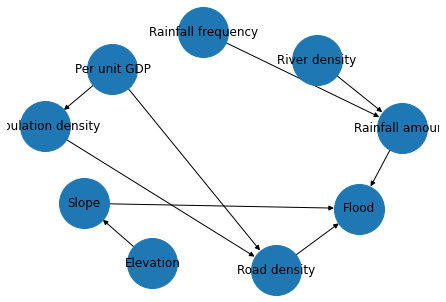

In [10]:
nx.draw(model, node_size = 2500, with_labels = True)
plt.show()

In [11]:
# ToDo: an idea can be to set the evidence, its cardinality and the state_names programmatically, 
# or even define these tables in a for loop

cpd_per_unit_gdp = TabularCPD(
    variable = PER_UNIT_GDP, 
    variable_card = len(state_names_dictionary[PER_UNIT_GDP]), 
    values = values_dictionary[PER_UNIT_GDP],
    state_names = get_state_names(PER_UNIT_GDP, state_names_dictionary, evidence_dictionary)
)

cpd_population_density = TabularCPD(
    variable = POPULATION_DENSITY, 
    variable_card = len(state_names_dictionary[POPULATION_DENSITY]), 
    values = values_dictionary[POPULATION_DENSITY],
    evidence = evidence_dictionary[POPULATION_DENSITY],
    evidence_card = get_evidence_card(POPULATION_DENSITY, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(POPULATION_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_road_density = TabularCPD(
    variable = ROAD_DENSITY, 
    variable_card = len(state_names_dictionary[ROAD_DENSITY]), 
    values = values_dictionary[ROAD_DENSITY],
    evidence = evidence_dictionary[ROAD_DENSITY],
    evidence_card = get_evidence_card(ROAD_DENSITY, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(ROAD_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_elevation = TabularCPD(
    variable = ELEVATION, 
    variable_card = len(state_names_dictionary[ELEVATION]), 
    values = values_dictionary[ELEVATION],
    state_names = get_state_names(ELEVATION, state_names_dictionary, evidence_dictionary)
)

cpd_slope = TabularCPD(
    variable = SLOPE, 
    variable_card = len(state_names_dictionary[SLOPE]), 
    values = values_dictionary[SLOPE],
    evidence = evidence_dictionary[SLOPE],
    evidence_card = get_evidence_card(SLOPE, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(SLOPE, state_names_dictionary, evidence_dictionary)
)

cpd_rainfall_frequency = TabularCPD(
    variable = RAINFALL_FREQUENCY, 
    variable_card = len(state_names_dictionary[RAINFALL_FREQUENCY]), 
    values = values_dictionary[RAINFALL_FREQUENCY],
    state_names = get_state_names(RAINFALL_FREQUENCY, state_names_dictionary, evidence_dictionary)
)

cpd_river_density = TabularCPD(
    variable = RIVER_DENSITY, 
    variable_card = len(state_names_dictionary[RIVER_DENSITY]), 
    values = values_dictionary[RIVER_DENSITY],
    state_names = get_state_names(RIVER_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_rainfall_amount = TabularCPD(
    variable = RAINFALL_AMOUNT, 
    variable_card = len(state_names_dictionary[RAINFALL_AMOUNT]), 
    values = values_dictionary[RAINFALL_AMOUNT],
    evidence = evidence_dictionary[RAINFALL_AMOUNT],
    evidence_card = get_evidence_card(RAINFALL_AMOUNT, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(RAINFALL_AMOUNT, state_names_dictionary, evidence_dictionary)
)

cpd_flood = TabularCPD(
    variable = FLOOD, 
    variable_card = len(state_names_dictionary[FLOOD]), 
    values = values_dictionary[FLOOD],
    evidence = evidence_dictionary[FLOOD],
    evidence_card = get_evidence_card(FLOOD, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(FLOOD, state_names_dictionary, evidence_dictionary)
)

In [12]:
model.add_cpds(cpd_per_unit_gdp, cpd_population_density, cpd_road_density, cpd_elevation, cpd_slope, cpd_rainfall_frequency, cpd_river_density, cpd_rainfall_amount, cpd_flood)
model.check_model()

True

In [13]:
cpd_to_pandas(cpd_per_unit_gdp)

,
Per unit GDP(High),0.30
Per unit GDP(Medium),0.63
Per unit GDP(Low),0.07


In [14]:
cpd_to_pandas(cpd_population_density)

,...,Per unit GDP(Low)
Population density(Dense),...,0.05
Population density(Medium),...,0.25
Population density(Sparse),...,0.70


In [15]:
cpd_to_pandas(cpd_road_density)

,...,Per unit GDP(Low)
,...,Population density(Sparse)
Road density(Dense),...,0.01
Road density(Medium),...,0.15
Road density(Sparse),...,0.84


In [16]:
cpd_to_pandas(cpd_elevation)

,
Elevation(High),0.15
Elevation(Medium),0.10
Elevation(Low),0.75


In [17]:
cpd_to_pandas(cpd_slope)

,Elevation(High),Elevation(Medium),Elevation(Low)
Slope(Steep),0.75,0.6,0.05
Slope(Flat),0.25,0.4,0.95


In [18]:
cpd_to_pandas(cpd_rainfall_frequency)

,
Rainfall frequency(Frequent),0.3
Rainfall frequency(Medium),0.6
Rainfall frequency(Rare),0.1


In [19]:
cpd_to_pandas(cpd_river_density)

,
River density(Dense),0.4
River density(Sparse),0.6


In [20]:
cpd_to_pandas(cpd_rainfall_amount)

,...,Rainfall frequency(Rare)
,...,River density(Sparse)
Rainfall amount(Huge),...,0.01
Rainfall amount(Medium),...,0.04
Rainfall amount(Little),...,0.95


In [21]:
cpd_to_pandas(cpd_flood)

,...,Road density(Sparse)
,...,Slope(Flat)
,...,Rainfall amount(Little)
Flood(Yes),...,0.0002
Flood(No),...,0.9998


In [22]:
# Getting all the independencies given the parent nodes in the network.
print('Independecies given the parent nodes shown using the function local_independencies():')
model.local_independencies(variables)

Independecies given the parent nodes shown using the function local_independencies():


(Per unit GDP ⟂ Rainfall frequency, Rainfall amount, River density, Elevation, Slope)
(Road density ⟂ Rainfall frequency, Rainfall amount, River density, Elevation, Slope | Population density, Per unit GDP)
(Population density ⟂ Rainfall frequency, Rainfall amount, River density, Elevation, Slope | Per unit GDP)
(Elevation ⟂ Rainfall frequency, Rainfall amount, Population density, River density, Road density, Per unit GDP)
(Slope ⟂ Rainfall frequency, Rainfall amount, Population density, River density, Road density, Per unit GDP | Elevation)
(Rainfall frequency ⟂ Population density, River density, Elevation, Slope, Road density, Per unit GDP)
(River density ⟂ Rainfall frequency, Population density, Elevation, Slope, Road density, Per unit GDP)
(Rainfall amount ⟂ Population density, Elevation, Slope, Road density, Per unit GDP | Rainfall frequency, River density)
(Flood ⟂ Rainfall frequency, Population density, River density, Elevation, Per unit GDP | Road density, Slope, Rainfall amoun

In [23]:
for v in variables:
    print(model.active_trail_nodes(v))

{'Per unit GDP': {'Road density', 'Flood', 'Population density', 'Per unit GDP'}}
{'Road density': {'Road density', 'Flood', 'Population density', 'Per unit GDP'}}
{'Population density': {'Road density', 'Flood', 'Population density', 'Per unit GDP'}}
{'Elevation': {'Elevation', 'Flood', 'Slope'}}
{'Slope': {'Flood', 'Slope', 'Elevation'}}
{'Rainfall frequency': {'Rainfall frequency', 'Flood', 'Rainfall amount'}}
{'River density': {'Rainfall amount', 'Flood', 'River density'}}
{'Rainfall amount': {'Rainfall amount', 'Flood', 'Rainfall frequency', 'River density'}}
{'Flood': {'Population density', 'Elevation', 'Rainfall amount', 'Rainfall frequency', 'River density', 'Slope', 'Road density', 'Flood', 'Per unit GDP'}}


In [24]:
# v- structure activated from the evidence therefore river density 
# influences rainfall frequency because rainfall amount is in the evidence
model.active_trail_nodes(RIVER_DENSITY, observed=RAINFALL_AMOUNT)

{'River density': {'Rainfall frequency', 'River density'}}

In [25]:
print(model.active_trail_nodes(POPULATION_DENSITY, observed=[ROAD_DENSITY, PER_UNIT_GDP]))
print(model.active_trail_nodes(POPULATION_DENSITY, observed=[ROAD_DENSITY, PER_UNIT_GDP]))

{'Population density': {'Population density'}}
{'Population density': {'Population density'}}


In [26]:
model.get_markov_blanket(POPULATION_DENSITY)

['Road density', 'Per unit GDP']

In [27]:
for v in variables:
    markov_blanket = model.get_markov_blanket(v)
    print(model.active_trail_nodes(v, observed=markov_blanket))
    print('Given {}'.format(markov_blanket))
    print()

{'Per unit GDP': {'Per unit GDP'}}
Given ['Road density', 'Population density']

{'Road density': {'Road density'}}
Given ['Per unit GDP', 'Population density', 'Rainfall amount', 'Flood', 'Slope']

{'Population density': {'Population density'}}
Given ['Road density', 'Per unit GDP']

{'Elevation': {'Elevation'}}
Given ['Slope']

{'Slope': {'Slope'}}
Given ['Elevation', 'Rainfall amount', 'Road density', 'Flood']

{'Rainfall frequency': {'Rainfall frequency'}}
Given ['Rainfall amount', 'River density']

{'River density': {'River density'}}
Given ['Rainfall amount', 'Rainfall frequency']

{'Rainfall amount': {'Rainfall amount'}}
Given ['Rainfall frequency', 'River density', 'Road density', 'Flood', 'Slope']

{'Flood': {'Flood'}}
Given ['Road density', 'Slope', 'Rainfall amount']



# Exact inference

In [28]:
exact_infer = VariableElimination(model)

**P(Flood)**

In [29]:
print(exact_infer.query([FLOOD], show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0785 |
+------------+--------------+
| Flood(No)  |       0.9215 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Flat)**

In [30]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Flat'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.1159 |
+------------+--------------+
| Flood(No)  |       0.8841 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)**

In [31]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Flat', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.1405 |
+------------+--------------+
| Flood(No)  |       0.8595 |
+------------+--------------+


**P(Flood | Road density = Medium, Slope = Flat, Rainfall Frequency = Frequent)**

In [32]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Medium', SLOPE: 'Flat', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0949 |
+------------+--------------+
| Flood(No)  |       0.9051 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Steep, Rainfall Frequency = Frequent)**

In [33]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0485 |
+------------+--------------+
| Flood(No)  |       0.9516 |
+------------+--------------+


**P(Slope | Flood = Yes)**

In [34]:
print(exact_infer.query([SLOPE], evidence={FLOOD: 'Yes'}, show_progress=False))

+--------------+--------------+
| Slope        |   phi(Slope) |
+==============+==============+
| Slope(Steep) |       0.0736 |
+--------------+--------------+
| Slope(Flat)  |       0.9264 |
+--------------+--------------+


**P(Rainfall Amount | Flood = Yes)**

In [35]:
print(exact_infer.query([RAINFALL_AMOUNT], evidence={FLOOD: 'Yes'}, show_progress=False))

+-------------------------+------------------------+
| Rainfall amount         |   phi(Rainfall amount) |
+=========================+========================+
| Rainfall amount(Huge)   |                 0.7210 |
+-------------------------+------------------------+
| Rainfall amount(Medium) |                 0.2605 |
+-------------------------+------------------------+
| Rainfall amount(Little) |                 0.0185 |
+-------------------------+------------------------+


**P(Rainfall Frequency | Rainfall Amount = Huge)**

In [36]:
print(exact_infer.query([RAINFALL_FREQUENCY], evidence={RAINFALL_AMOUNT: 'Huge'}, show_progress=False))

+------------------------------+---------------------------+
| Rainfall frequency           |   phi(Rainfall frequency) |
+==============================+===========================+
| Rainfall frequency(Frequent) |                    0.4157 |
+------------------------------+---------------------------+
| Rainfall frequency(Medium)   |                    0.5733 |
+------------------------------+---------------------------+
| Rainfall frequency(Rare)     |                    0.0110 |
+------------------------------+---------------------------+


**P(Rainfall Frequency | Rainfall Amount = Huge)**

In [37]:
print(exact_infer.query([RAINFALL_FREQUENCY], evidence={RAINFALL_AMOUNT: 'Little'}, show_progress=False))

+------------------------------+---------------------------+
| Rainfall frequency           |   phi(Rainfall frequency) |
+==============================+===========================+
| Rainfall frequency(Frequent) |                    0.2021 |
+------------------------------+---------------------------+
| Rainfall frequency(Medium)   |                    0.5106 |
+------------------------------+---------------------------+
| Rainfall frequency(Rare)     |                    0.2872 |
+------------------------------+---------------------------+


In [38]:
#print(exact_infer.query([RIVER_DENSITY], evidence={RAINFALL_AMOUNT: 'Huge'}, show_progress=False))

In [39]:
print(exact_infer.query([RAINFALL_AMOUNT], show_progress=False))

+-------------------------+------------------------+
| Rainfall amount         |   phi(Rainfall amount) |
+=========================+========================+
| Rainfall amount(Huge)   |                 0.4186 |
+-------------------------+------------------------+
| Rainfall amount(Medium) |                 0.2994 |
+-------------------------+------------------------+
| Rainfall amount(Little) |                 0.2820 |
+-------------------------+------------------------+


In [40]:
print(exact_infer.query([SLOPE], show_progress=False))

+--------------+--------------+
| Slope        |   phi(Slope) |
+==============+==============+
| Slope(Steep) |       0.2100 |
+--------------+--------------+
| Slope(Flat)  |       0.7900 |
+--------------+--------------+


# Approximate Inference

### Using Sampling

In [41]:
approx_infer_sampling = ApproxInference(model)

#### A comparison between exact and approximate inference will be performed in the following lines

In [42]:
print("Exact Inference to find P(Flood)\n")
print(exact_infer.query([FLOOD], show_progress=False))

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], n_samples=10000, show_progress=False))

Exact Inference to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0785 |
+------------+--------------+
| Flood(No)  |       0.9215 |
+------------+--------------+
Approximate Inference with sampling to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9209 |
+------------+--------------+
| Flood(Yes) |       0.0791 |
+------------+--------------+


C:\Users\franc\anaconda3\lib\site-packages\pgmpy\utils\mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  warn(


The result shows that approximate inference gives a very good estimation of the probability distribution of Flood, since the values are very close the ones we get with exact inference. The main reason is that we used a very high number of samples, which approximates well the limit to infinity

#### P(Flood | Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)

In [43]:
import time
start_time = time.time_ns()

print("Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)\n")
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

print(f"--- {(time.time_ns() - start_time) / 1000000000} seconds ---")

start_time = time.time_ns()

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, n_samples=10000, show_progress=False))


print(f"--- {(time.time_ns() - start_time)  / 1000000000} seconds ---")

Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0485 |
+------------+--------------+
| Flood(No)  |       0.9516 |
+------------+--------------+
--- 0.016999 seconds ---
Approximate Inference with sampling to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9535 |
+------------+--------------+
| Flood(Yes) |       0.0465 |
+------------+--------------+
--- 2.4849726 seconds ---


As for the case above, the estimation using approximate inference is very good, since we used many samples. Unfortunatelly, this results in having a longer execution time than using exact inference, so there is no benefit in using approximate inference with those many samples.
Rather, we can dramatically decrease the number of samples and see what happens

In [44]:
start_time = time.time_ns()

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, n_samples=1000, show_progress=False))

print(f"--- {(time.time_ns() - start_time)  / 1000000000} seconds ---")

Approximate Inference with sampling to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9470 |
+------------+--------------+
| Flood(Yes) |       0.0530 |
+------------+--------------+
--- 0.3200219 seconds ---


Approximate inference still works quiet well, but gives results worse than the first try with more samples. In addition, the execution time is perfectly comparable to the one of exact inference

## Using Markov Chain Monte Carlo Method

In [45]:
from pgmpy.sampling import GibbsSampling

gibbs = GibbsSampling(model)
df = gibbs.sample(size=10000)

C:\Users\franc\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:529: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(


C:\Users\franc\anaconda3\lib\site-packages\pgmpy\utils\mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
  warn(
C:\Users\franc\anaconda3\lib\site-packages\pgmpy\utils\mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
  warn(


In [46]:
#Flood  No:0, Yes:1
series_Flood = df['Flood'].value_counts()

print('Phi(Flood = Yes) =',series_Flood[0]/(sum(series_Flood)) )
print('Phi(Flood = No) = ',series_Flood[1]/(sum(series_Flood)) )

Phi(Flood = Yes) = 0.0734
Phi(Flood = No) =  0.9266


In [47]:
#EXAMPLE WITH MORE THAN ONE STATE
#Flood  No:0, Yes:1
#GDP high: 0, medium: 1, low: 2
series_Flood_GDP = df.loc[df['Per unit GDP'] == 0]['Flood'].value_counts()

print('Phi(Flood = Yes | Per unit GDP==High) =',series_Flood_GDP[0]/(sum(series_Flood_GDP)) )
print('Phi(Flood = No | Per unit GDP==High) = ',series_Flood_GDP[1]/(sum(series_Flood_GDP)) )

Phi(Flood = Yes | Per unit GDP==High) = 0.08125421443020904
Phi(Flood = No | Per unit GDP==High) =  0.9187457855697909
